<a href="https://colab.research.google.com/github/coralmaven/kepler-exoplanets/blob/master/Copy_of_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [0]:
df_orig = pd.read_csv("cumulative.csv")
df_orig.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [0]:
df_orig.size

478200

In [0]:
#df = df_orig.head(1000)

In [0]:
df = df_orig.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Label Encoder: Transform Labels to Numbers

In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(df['koi_disposition'])
label_encoder.classes_

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [0]:
df['koi_disposition'] = label_encoder.transform(df['koi_disposition'])

In [0]:
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Perform Feature Selection

In [0]:
df.koi_disposition.unique()

array([1, 2, 0])

In [0]:
df.describe()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8.744000e+03,8.744000e+03,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8.744000e+03,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8.744000e+03,8.744000e+03,8.744000e+03,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000
mean,1.256633,0.157136,0.241194,0.201167,0.125114,56.080618,1.839523e-03,-1.839523e-03,164.563271,0.009300,-0.009300,0.718315,1.972656,-0.330185,5.521409,0.317958,-0.317958,2.355689e+04,119.695174,-119.695174,103.932190,17.553652,-34.046233,1087.503545,7.237635e+03,3.387183e+03,-3.775831e+03,268.401315,1.240279,5698.246569,144.103500,-161.354758,4.310223,0.120733,-0.140411,1.704566,0.352884,-0.379933,292.075061,43.828259,14.273969
std,0.821207,0.363950,0.427832,0.400895,0.330867,117.385280,7.276504e-03,7.276504e-03,66.476457,0.021662,0.021662,3.176618,9.464462,1.227048,6.318934,0.641691,0.641691,8.187998e+04,4196.518567,4196.518567,3151.780687,395.040369,1223.495531,839.110779,1.590966e+05,5.120450e+04,8.891809e+04,811.988767,0.654931,797.953594,47.284063,72.986448,0.431557,0.132813,0.082936,5.682429,0.906364,1.810943,4.772918,3.599786,1.343509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.167000,0.000000,-20.200000,4.500000e+00,0.000000,-388600.000000,0.140000,0.000000,-77180.000000,92.000000,2.000000e-02,0.000000e+00,-5.600031e+06,1.600000,1.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-103.825000,279.852720,36.577381,6.966000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2.667824,5.286750e-06,-2.456250e-04,132.729408,0.001200,-0.010000,0.197000,0.040000,-0.447000,2.437750,0.050275,-0.331000,1.606000e+02,9.475000,-47.600000,1.400000,0.240000,-2.032500,551.000000,2.181500e+01,1.110000e+01,-2.944275e+02,12.400000,1.000000,5296.000000,105.000000,-197.000000,4.215750,0.043000,-0.195000,0.826000,0.125750,-0.247000,288.670237,40.805911,13.474000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,8.970985,3.323000e-05,-3.323000e-05,136.910235,0.004020,-0.004020,0.540500,0.192000,-0.207000,3.778935,0.137500,-0.137500,4.218500e+02,20.200000,-20.200000,2.400000,0.510000,-0.310000,884.000000,1.446250e+02,7.821500e+01,-4.389000e+01,23.650000,1.000000,5757.000000,157.000000,-159.000000,4.439000,0.070000,-0.127000,0.997000,0.246000,-0.111000,292.285005,43.703989,14.534000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,34.190033,2.456250e-04,-5.286750e-06,169.975942,0.010000,-0.001200,0.889000,0.378850,-0.045000,6.172000,0.331000,-0.050275,1.462875e+03,47.600000,-9.475000,14.872500,2.542500,-0.140000,1381.000000,8.595850e+02,5.304350e+02,-6.280000e+00,79.300000,1.000000,6109.000000,174.000000,-112.000000,4.544000,0.149000,-0.087000,1.346250,0.356000,-0.069000,295.900510,46.722135,15.318250
max,2.000000,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.541400e+06,388600.000000,0.000000,200346.000000,21640.000000,0.000000,14667.000000,1.094755e+07,3.617133e+06,0.000000e+00,9054.700000,8.000000,15896.000000,676.000000,0.000000,5.364000,1.472000,0.000000,18

In [0]:
df.groupby(['koi_disposition']).groups.keys()

dict_keys([0, 1, 2])

In [0]:
df0 = df.loc[df['koi_disposition']==0]
df1 = df.loc[df['koi_disposition']==1]
df2 = df.loc[df['koi_disposition']==2]

In [0]:
allfeatures = df.columns[1:]

In [0]:
feature_dict = dict(zip(allfeatures, [(df0[i].var()+ df1[i].var()+ df2[i].var()) for i in allfeatures if(df0[i].var()!=0 and df1[i].var()!=0 and df2[i].var()!=0)]))

In [0]:
from collections import OrderedDict
OrderedDict(sorted(feature_dict.items(), key=lambda x:x[1]))

OrderedDict([('koi_fpflag_co', 0.00013318890490430463),
             ('koi_fpflag_ec', 0.00013318890490430463),
             ('koi_period_err1', 0.0013478008612730745),
             ('koi_period_err2', 0.0013478008612730745),
             ('koi_steff_err2', 0.019147574024365815),
             ('koi_steff_err1', 0.04596376462607618),
             ('koi_fpflag_nt', 0.27542729716279435),
             ('koi_steff', 0.4691248978801447),
             ('koi_impact_err1', 1.0599163116564003),
             ('koi_impact_err2', 1.0599163116564003),
             ('koi_insol_err1', 1.3736765704110177),
             ('koi_slogg_err1', 1.8138555600350412),
             ('koi_time0bk_err2', 4.00312732413939),
             ('koi_srad_err2', 5.1871532529496776),
             ('koi_slogg_err2', 8.32489133422878),
             ('koi_time0bk', 22.289648071349067),
             ('koi_srad_err1', 38.48654566810632),
             ('koi_srad', 67.34489754713746),
             ('koi_slogg', 82.87631458102928),


# Assign X values



In [0]:
#features with the most variance
X = df[['koi_duration', 'koi_teq', 'koi_prad_err1']]


# Use `koi_disposition` for the y values

In [0]:
y = df['koi_disposition'].values.reshape(-1,1)
y

array([[1],
       [1],
       [2],
       ...,
       [0],
       [2],
       [2]])

In [0]:
X = pd.get_dummies(X)
X.head()

,koi_duration_err1,koi_duration_err2,koi_prad_err2,koi_duration,koi_teq,koi_prad_err1
0,0.08190,-0.08190,-0.15,2.95750,793.0,0.26
1,0.11600,-0.11600,-0.19,4.50700,443.0,0.32
2,0.03410,-0.03410,-1.31,1.78220,638.0,3.92
3,0.00537,-0.00537,-2.83,2.40641,1395.0,8.50
4,0.04200,-0.04200,-0.35,1.65450,1406.0,0.88


In [0]:
X.describe()

,koi_duration_err1,koi_duration_err2,koi_prad_err2,koi_duration,koi_teq,koi_prad_err1
count,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000
mean,0.317958,-0.317958,-34.046233,5.521409,1087.503545,17.553652
std,0.641691,0.641691,1223.495531,6.318934,839.110779,395.040369
min,0.000000,-20.200000,-77180.000000,0.167000,92.000000,0.000000
25%,0.050275,-0.331000,-2.032500,2.437750,551.000000,0.240000
50%,0.137500,-0.137500,-0.310000,3.778935,884.000000,0.510000
75%,0.331000,-0.050275,-0.140000,6.172000,1381.000000,2.542500
max,20.200000,0.000000,0.000000,138.540000,14667.000000,21640.000000


# Create Test Train Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

In [0]:
X_train.head()

,koi_duration_err1,koi_duration_err2,koi_prad_err2,koi_duration,koi_teq,koi_prad_err1
3206,0.0559,-0.0559,-2.91,7.6213,553.0,8.75
3954,0.3500,-0.3500,-0.19,8.6790,787.0,0.20
1410,0.0793,-0.0793,-0.24,3.8573,914.0,0.73
5865,0.2110,-0.2110,-0.04,2.4560,832.0,0.03
340,0.1270,-0.1270,-0.16,3.4420,1572.0,0.36


# Pre-processing

Scale the data using the MinMaxScaler

In [0]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

In [0]:
X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

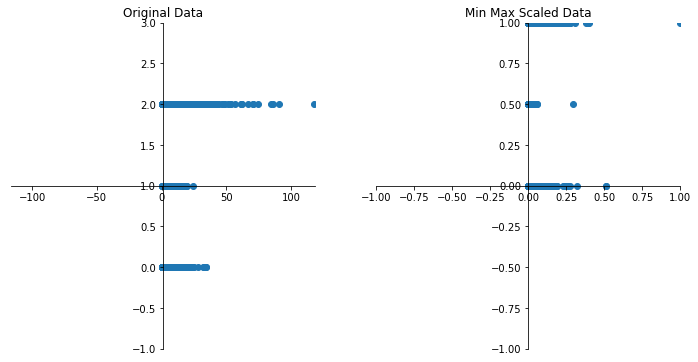

In [0]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Min Max Scaled Data")

maxx = X_train["koi_duration"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-1, 1)
axes2.set_ylim(-1, 1)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["koi_duration"], y_train)
axes2.scatter(X_train_minmax[:,0], y_train_minmax[:])

# Pre-processing Scale the data using the StandardScaler

In [0]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit(X_train)
y_scaled = StandardScaler().fit(y_train)

In [0]:
X_train_scaled = X_scaled.transform(X_train)
X_test_scaled = X_scaled.transform(X_test)
y_train_scaled = y_scaled.transform(y_train)
y_test_scaled = y_scaled.transform(y_test)

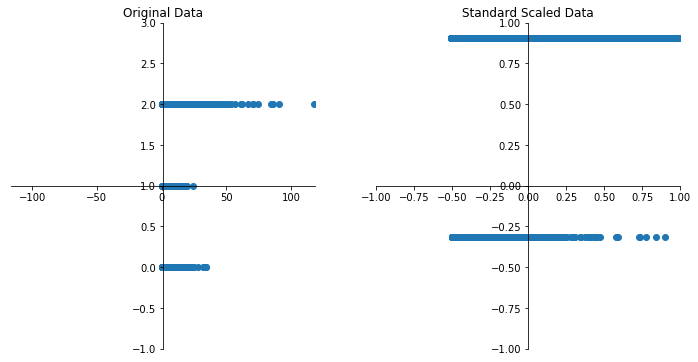

In [0]:
import matplotlib.pyplot as plt

fig2 = plt.figure(figsize=(12, 6))
axes12 = fig2.add_subplot(1, 2, 1)
axes22 = fig2.add_subplot(1, 2, 2)

axes12.set_title("Original Data")
axes22.set_title("Standard Scaled Data")

maxx = X_train["koi_duration"].max()
maxy = y_train.max()
axes12.set_xlim(-maxx + 1, maxx + 1)
axes12.set_ylim(-maxy + 1, maxy + 1)

axes22.set_xlim(-1, 1)
axes22.set_ylim(-1, 1)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes12)
set_axes(axes22)

axes12.scatter(X_train["koi_duration"], y_train)
axes22.scatter(X_train_scaled[:,0], y_train_scaled[:])

# Train the Support Vector Machine

In [0]:
%%time
from sklearn.svm import SVC
model1 = SVC(kernel='linear')
model1.fit(X_train, y_train)
model1

In [0]:
print(f"Training Data Score: {model1.score(X_train, y_train)}")
print(f"Testing Data Score: {model1.score(X_test, y_test)}")

Training Data Score: 0.7816407441293077
Testing Data Score: 0.7772186642268984


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

# Create the GridSearchCV model

In [0]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10,50],
             'gamma': [0.0001, 0.0005]}
grid = GridSearchCV(model1, param_grid, verbose=3)

In [0]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.782, total= 1.1min
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.782, total=  41.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.783, total=  55.4s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.782, total= 1.3min
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.782, total=  58.7s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.783, total= 1.1min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.782, total= 1.3min
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.782, total=  49.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.783, total= 1.2min
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 100.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [0]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.7833180847819458
